In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
    

In [2]:
# ランダムウォークのデータと計測データを生成
def create_data(n, v, w):
    xx_true = np.ndarray(n)
    yy = np.ndarray(n)
    xx_true[0] = 0
    for i in range(1, n):
        xx_true[i] = xx_true[i-1] + np.random.normal(0.0, math.sqrt(v))
    yy = xx_true + np.random.normal(0.0, math.sqrt(w), n)
    return xx_true, yy

In [3]:
# ローカルレベルモデルで計測値から次のデータを予測
def predict_llm(x, x_var, y, v, w):
    # 現在値の予測
    predict_x     = x           # 期待値は前回の値のそのまま
    predict_x_var = x_var + v   # 分散を加算される
    
    # カルマンゲインを計算
    kalman_gain = predict_x_var / (predict_x_var + w)
    
    # 計測値と合成
    next_x     = predict_x + kalman_gain * (y - predict_x)
    next_x_var = (1 - kalman_gain) * predict_x_var
    
    # 2変数の最適合成という点ではこう書いても等価のはず
#   next_x     = (w * predict_x +  predict_x_var * y) / (predict_x_var * w)
#   next_x_var = (predict_x_var * w) / (predict_x_var + w)
 
    return next_x, next_x_var

In [4]:
# ローカルレベルモデルで計測値から予測を実施
def calc_predict(yy, v, w):
    n = len(yy)
    xx     = np.ndarray(n)
    xx_var = np.ndarray(n)
    xx[0]     = 0
    xx_var[0] = 0
    for i in range(1, n):
        xx[i], xx_var[i] = predict_llm(xx[i-1], xx_var[i-1], yy[i], v, w)
    return xx, xx_var

In [10]:
# 分散が既知の状態で計算してみる
v = 2.0
w = 3.0
xx_true, yy = create_data(100, v, w)
xx, xx_var  = calc_predict(yy, v, w)

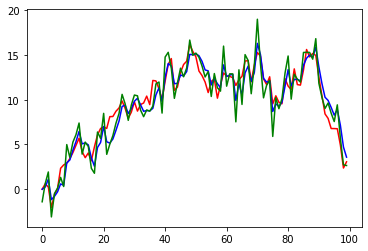

In [11]:
plt.plot(xx_true, c='red')
plt.plot(xx, c='blue')
plt.plot(yy, c='green')

In [ ]:
# 分散をデータから予測する
# のを今度やってみよう